In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

In [3]:
product_data = pd.read_csv('product_info.csv')
product_data.head(4)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,variation_desc,ingredients,price_usd,value_price_usd,sale_price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,NaN,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,NaN,0,0,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


## DESCRIPTIVE STATISTICS 

In [4]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [5]:
product_data.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [6]:
threshold = len(product_data) * 0.5
product_cleaned = product_data.dropna(thresh=threshold, axis=1)

In [7]:
product_cleaned= product_cleaned.dropna()

In [8]:
product_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4392 entries, 1 to 8490
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          4392 non-null   object 
 1   product_name        4392 non-null   object 
 2   brand_id            4392 non-null   int64  
 3   brand_name          4392 non-null   object 
 4   loves_count         4392 non-null   int64  
 5   rating              4392 non-null   float64
 6   reviews             4392 non-null   float64
 7   size                4392 non-null   object 
 8   variation_type      4392 non-null   object 
 9   variation_value     4392 non-null   object 
 10  ingredients         4392 non-null   object 
 11  price_usd           4392 non-null   float64
 12  limited_edition     4392 non-null   int64  
 13  new                 4392 non-null   int64  
 14  online_only         4392 non-null   int64  
 15  out_of_stock        4392 non-null   int64  
 16  sephora_exc

In [9]:
print ("\nUnique values :  \n",product_cleaned.nunique())


Unique values :  
 product_id            4392
product_name          4380
brand_id               255
brand_name             255
loves_count           4139
rating                2902
reviews               1278
size                  1412
variation_type           7
variation_value       1765
ingredients           3968
price_usd              242
limited_edition          2
new                      2
online_only              2
out_of_stock             2
sephora_exclusive        2
highlights            3366
primary_category         7
secondary_category      30
tertiary_category       96
child_count             51
dtype: int64


In [10]:
### Change type for some column to boolan

product_cleaned['limited_edition'] = product_cleaned['limited_edition'].astype('bool')
product_cleaned['new'] = product_cleaned['new'].astype('bool')
product_cleaned['online_only'] = product_cleaned['online_only'].astype('bool')
product_cleaned['out_of_stock'] = product_cleaned['out_of_stock'].astype('bool')
product_cleaned['sephora_exclusive'] = product_cleaned['sephora_exclusive'].astype('bool')

product_cleaned[['limited_edition', 'new', 'online_only', 'out_of_stock', 'sephora_exclusive']]

,limited_edition,new,online_only,out_of_stock,sephora_exclusive
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False
5,False,False,True,False,False
...,...,...,...,...,...
8473,False,False,False,True,True
8476,False,False,False,False,False
8477,False,False,False,False,False
8486,False,False,False,True,False


In [11]:
product_cleaned.head(4)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,ingredients,price_usd,limited_edition,new,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,False,False,True,False,False,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,False,False,True,False,False,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,False,False,True,False,False,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,False,False,True,False,False,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2


## DATA VISUALIZATION and STATISTICS  

In [12]:
product_cleaned.describe()

,brand_id,loves_count,rating,reviews,price_usd,child_count
count,4392.000000,4.392000e+03,4392.000000,4392.000000,4392.000000,4392.000000
mean,5650.868169,3.471239e+04,4.248577,529.590392,50.918393,2.227914
std,1512.104443,7.545586e+04,0.441321,1184.242415,46.462817,6.309754
min,1063.000000,0.000000e+00,1.000000,1.000000,3.000000,0.000000
25%,5737.000000,4.244000e+03,4.043350,47.000000,26.000000,0.000000
50%,6207.000000,1.143050e+04,4.319800,188.500000,36.000000,0.000000
75%,6342.000000,3.247250e+04,4.542050,516.250000,58.000000,1.000000
max,8020.000000,1.401068e+06,5.000000,21281.000000,425.000000,78.000000


## Top Thirty brands 

In [13]:
top_brands =  product_cleaned['brand_name'].value_counts().reset_index().head(30)
top_brands.columns = ['brand_name', 'count']
top_brands.head(5)

,brand_name,count
0,Kérastase,102
1,SEPHORA COLLECTION,100
2,Oribe,68
3,Bumble and bumble,61
4,TOM FORD,58


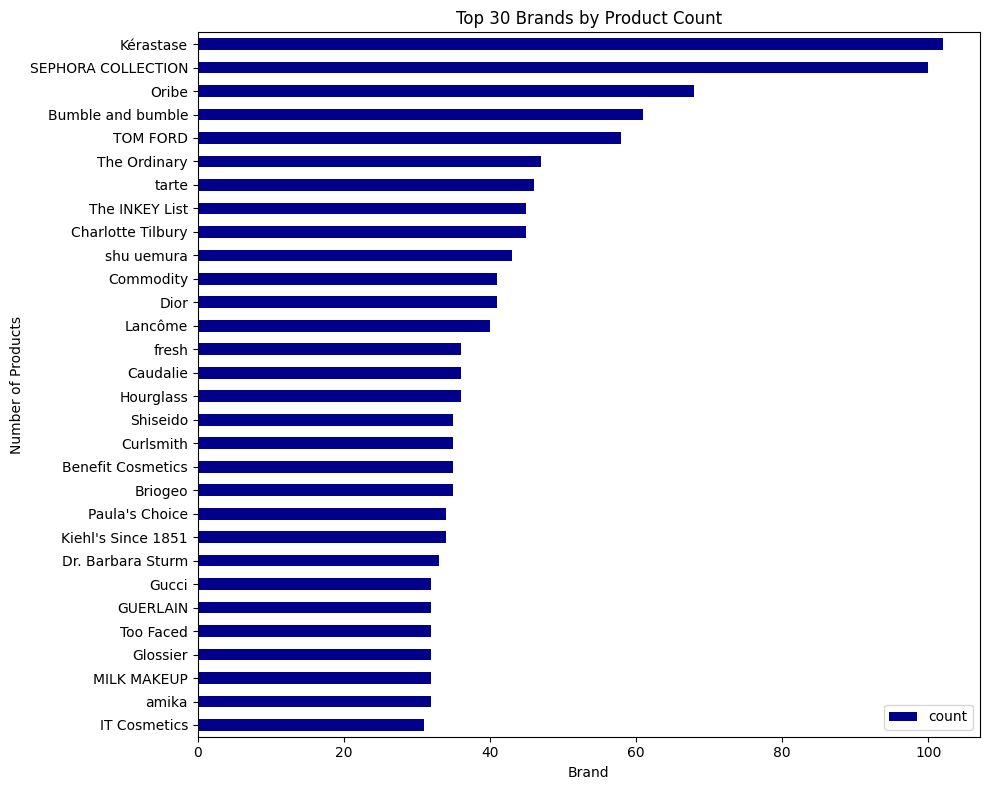

In [14]:
# Plotting the top 30 brands by product count
top_brands.iloc[:: -1].plot(kind='barh',x='brand_name', color='darkblue',figsize=(10, 8))
plt.title("Top 30 Brands by Product Count")
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.tight_layout()
plt.show()

## Customer Engagement - Top Products by loves_count, reviews and Ratings

In [15]:
#top fifty product and brands base on reviews 
top_products_reviews = product_cleaned[['product_name', 'brand_name', 'reviews']].sort_values(by='reviews', ascending=False).head(50).reset_index()
top_products_reviews.head(5)

,index,product_name,brand_name,reviews
0,4250,Tattoo Liner Vegan Waterproof Liquid Eyeliner,KVD Beauty,21281.0
1,7843,Better Than Sex Volumizing & Lengthening Mascara,Too Faced,18610.0
2,7978,24/7 Glide-On Waterproof Eyeliner Pencil,Urban Decay,17179.0
3,527,They're Real! Lengthening Mascara,Benefit Cosmetics,15756.0
4,7845,Born This Way Natural Finish Longwear Liquid F...,Too Faced,14882.0


In [16]:
#top fifty products and brands base on loves_count
top_products_loves = product_cleaned[['product_name', 'brand_name', 'loves_count']].sort_values(by='loves_count', ascending=False).head(50).reset_index()
top_products_loves.head(5)

,index,product_name,brand_name,loves_count
0,6242,Soft Pinch Liquid Blush,Rare Beauty by Selena Gomez,1401068
1,5249,Radiant Creamy Concealer,NARS,1153594
2,6434,Cream Lip Stain Liquid Lipstick,SEPHORA COLLECTION,1029051
3,2523,Gloss Bomb Universal Lip Luminizer,Fenty Beauty by Rihanna,968317
4,4458,Translucent Loose Setting Powder,Laura Mercier,813497


In [17]:
##top fifty products and brand  base on rating
top_products_rating = product_cleaned[['product_name', 'brand_name', 'rating']].sort_values(by='rating', ascending=False)\
    .head(50).reset_index(drop=True)
top_products_rating.head(15)

,product_name,brand_name,rating
0,MEN Clinically Proven Hair Growth Supplement f...,Nutrafol,5.0
1,Brightening Face Cream,Dr. Barbara Sturm,5.0
2,Mini Weightless Air Dry Curly Hair Cream,Curlsmith,5.0
3,35% Vitamin C Fusion Serum,SOBEL SKIN Rx,5.0
4,Aquarius BHA + Blue Tansy Clarity Cleanser,Herbivore,5.0
5,Dior Addict Shine Lipstick Refill,Dior,5.0
6,Rouge Dior Lipstick Refill,Dior,5.0
7,Moss- Personal,Commodity,5.0
8,Hydra Life Intense Sorbet Crème Moisturizer,Dior,5.0
9,Capture Dreamskin 1-Minute Mask,Dior,5.0


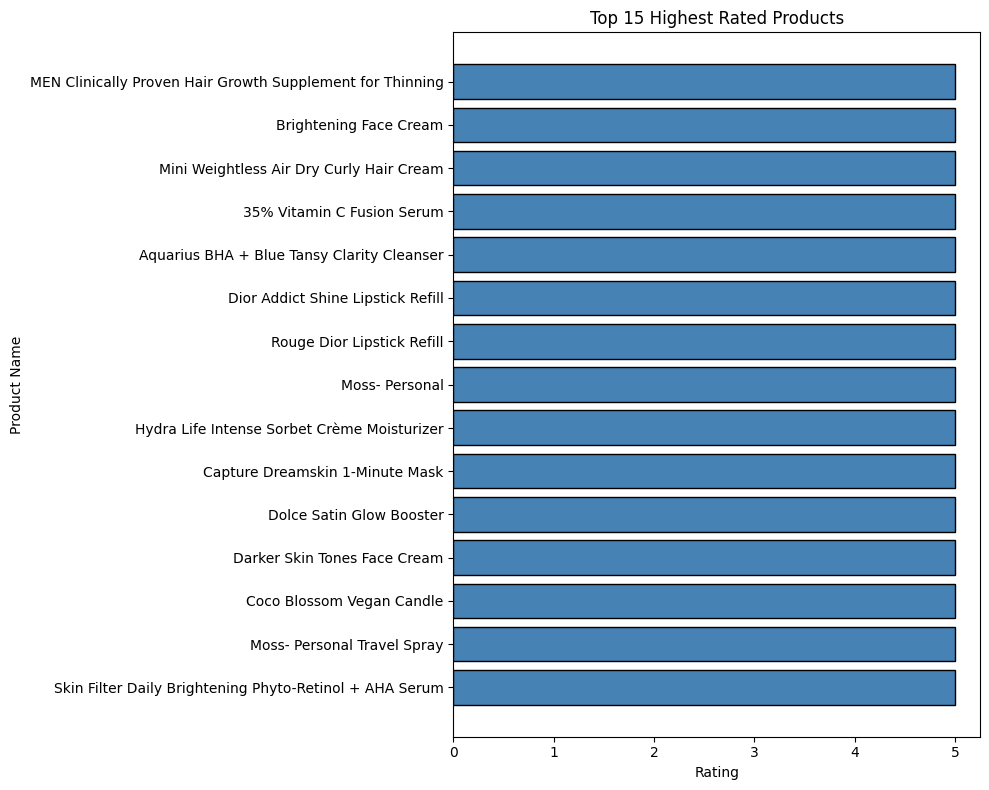

In [18]:
# Select the top 15 highest-rated products
top_15_products = top_products_rating.head(15)

# Plot the data
plt.figure(figsize=(10, 8))
plt.barh(top_15_products['product_name'], top_15_products['rating'], color='#4682B4', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Product Name')
plt.title('Top 15 Highest Rated Products')
plt.gca().invert_yaxis()  # Invert y-axis to show highest rating at the top
plt.tight_layout()
plt.show()

In [19]:
#bottom fifty products base on love_counts
bottom_products_love = product_cleaned[['product_name', 'brand_name', 'loves_count']].sort_values(by='loves_count')\
    .head(50).reset_index(drop=True)
bottom_products_love.head(5)

,product_name,brand_name,loves_count
0,Matte Revolution Lipstick - Walk of No Shame C...,Charlotte Tilbury,0
1,Cleopatra Travel Spray,TOCCA,0
2,Rouge Interdit Vinyl Color Enhancing Lipstick ...,Givenchy,0
3,Love is Louder Lip + Cheek Pencil,NUDESTIX,0
4,Green Clean Makeup Meltaway Cleansing Balm Lim...,Farmacy,0


In [20]:
#bottom fifty product base on reviews 
bottom_products_reviews = product_cleaned[['product_name', 'brand_name', 'reviews']].sort_values(by='reviews')\
    .head(50).reset_index(drop=True)
bottom_products_reviews.head(5)

,product_name,brand_name,reviews
0,Mini Brazilian Joia Strengthening + Smoothing ...,Sol de Janeiro,1.0
1,Book+ Bold Travel Spray,Commodity,1.0
2,Gold- Personal Travel Spray,Commodity,1.0
3,Mini Floral Recovery Overnight Mask with Squalane,fresh,1.0
4,Wonderland Bloom Scent Diffuser,Floral Street,1.0


## Price Analysis

In [21]:
product_cleaned['price_usd'].describe()

count    4392.000000
mean       50.918393
std        46.462817
min         3.000000
25%        26.000000
50%        36.000000
75%        58.000000
max       425.000000
Name: price_usd, dtype: float64

In [22]:
expensive_products = product_cleaned[['product_name', 'brand_name', 'price_usd']].sort_values(by='price_usd', ascending=False )\
    .head(50).reset_index(drop=True)
expensive_products.head(10)

,product_name,brand_name,price_usd
0,The Concentrate Serum,La Mer,425.0
1,The Regenerating Serum,La Mer,410.0
2,Ultimate Revival Cream,SK-II,400.0
3,Lost Cherry,TOM FORD,395.0
4,Soleil Brulant,TOM FORD,395.0
5,Fucking Fabulous,TOM FORD,395.0
6,Electric Cherry,TOM FORD,395.0
7,Cherry Smoke,TOM FORD,395.0
8,Rose Prick,TOM FORD,395.0
9,The Serum with TFC8,Augustinus Bader,390.0


In [23]:
expensive_products[['brand_name']].value_counts()

brand_name                       
TOM FORD                             17
La Mer                                9
KILIAN Paris                          8
Dr. Barbara Sturm                     5
Augustinus Bader                      3
Lancôme                               2
SK-II                                 2
AERIN                                 1
Charlotte Tilbury                     1
Dr. Lara Devgan Scientific Beauty     1
Shiseido                              1
Name: count, dtype: int64

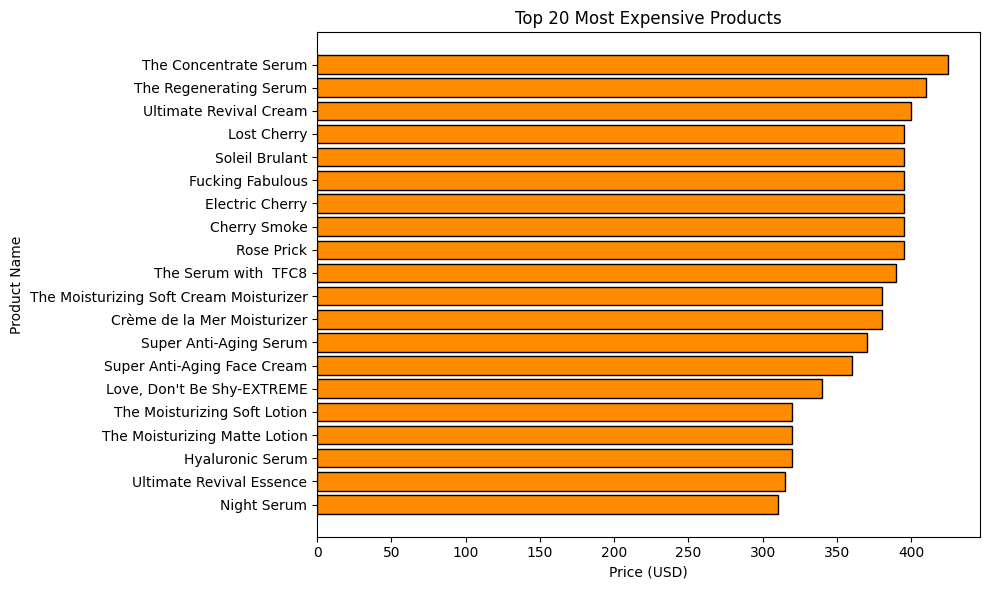

In [25]:
# Select the top 10 most expensive products for plotting
top_20_expensive = expensive_products.head(20)

# Plot the data
plt.figure(figsize=(10, 6))
plt.barh(top_20_expensive['product_name'], top_20_expensive['price_usd'], color='#FF8C00', edgecolor='black')
plt.xlabel('Price (USD)')
plt.ylabel('Product Name')
plt.title('Top 20 Most Expensive Products')
plt.gca().invert_yaxis()  # Invert y-axis to show most expensive at the top
plt.tight_layout()
plt.show()

## Price Distribution 

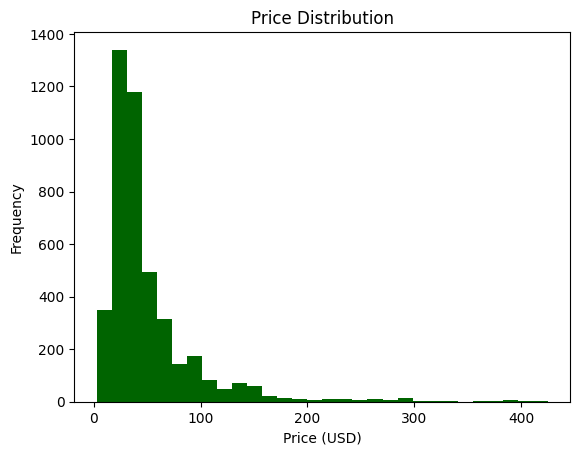

In [ ]:
product_cleaned['price_usd'].plot(kind='hist', bins=30, color='darkgreen')
plt.title("Price Distribution")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10740\3415347059.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


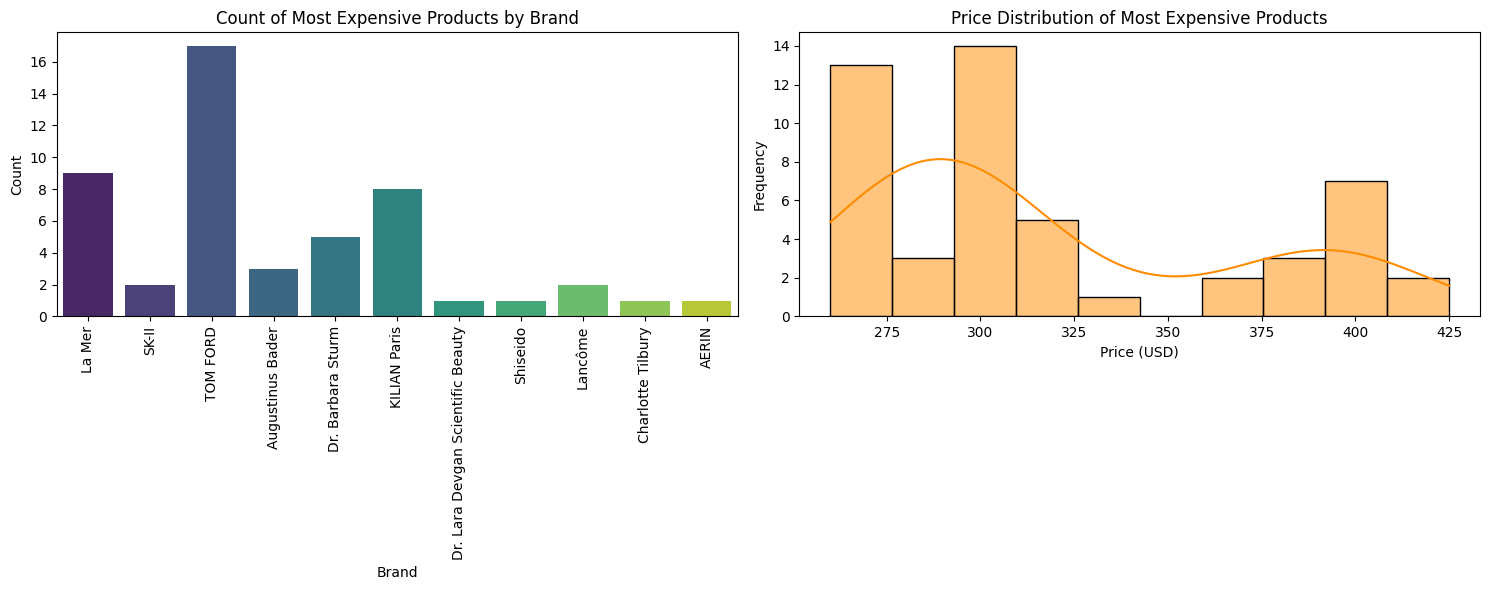

In [ ]:
# Set up the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First subplot: Countplot for brand names in the most expensive products
sns.countplot(data=expensive_products, x='brand_name', ax=axes[0], palette='viridis')
axes[0].set_title("Count of Most Expensive Products by Brand")
axes[0].set_xlabel("Brand")
axes[0].set_ylabel("Count")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

# Second subplot: Histogram for price distribution
sns.histplot(data=expensive_products, x='price_usd', ax=axes[1], bins=10, color='#FF8C00', kde=True)
axes[1].set_title("Price Distribution of Most Expensive Products")
axes[1].set_xlabel("Price (USD)")
axes[1].set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Inventory analysis

In [ ]:
inventory = product_cleaned[['product_name','brand_name','price_usd','new','limited_edition','online_only','out_of_stock','sephora_exclusive']]
inventory

,product_name,brand_name,price_usd,new,limited_edition,online_only,out_of_stock,sephora_exclusive
1,La Habana Eau de Parfum,19-69,195.0,False,False,True,False,False
2,Rainbow Bar Eau de Parfum,19-69,195.0,False,False,True,False,False
3,Kasbah Eau de Parfum,19-69,195.0,False,False,True,False,False
4,Purple Haze Eau de Parfum,19-69,195.0,False,False,True,False,False
5,Kasbah Eau de Parfum Travel Spray,19-69,30.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...
8473,NU TONE CORRECTOR Color Corrector with Vitamin E,Yves Saint Laurent,34.0,False,False,False,True,True
8476,L'Homme Cologne Bleue,Yves Saint Laurent,89.0,False,False,False,False,False
8477,Y Eau de Toilette,Yves Saint Laurent,120.0,False,False,False,False,False
8486,Y Eau Fraiche,Yves Saint Laurent,99.0,False,False,False,True,False


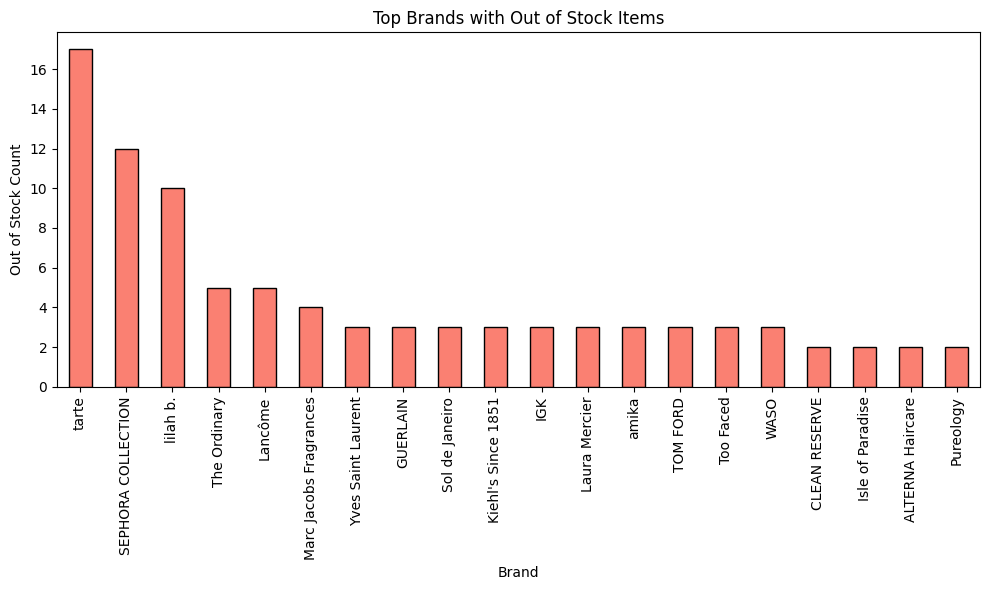

In [ ]:
# Count out-of-stock items by brand
out_of_stock_brands = inventory[inventory['out_of_stock'] == True]['brand_name'].value_counts().head(20)

# Plot the top brands with out-of-stock items
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
out_of_stock_brands.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Top Brands with Out of Stock Items")
plt.xlabel("Brand")
plt.ylabel("Out of Stock Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

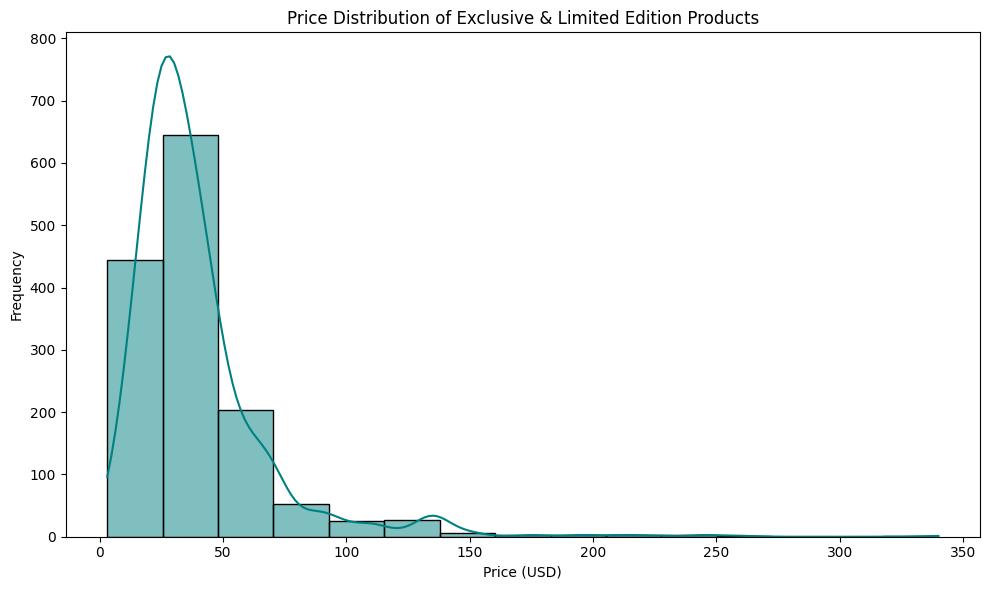

In [ ]:
# Filter data for exclusive and limited edition items
exclusive_limited = inventory[(inventory['limited_edition'] == True) | (inventory['sephora_exclusive'] == True)]

# Plot distribution of prices for exclusive and limited edition items
plt.figure(figsize=(10, 6))
sns.histplot(exclusive_limited['price_usd'], bins=15, color='teal', kde=True)
plt.title("Price Distribution of Exclusive & Limited Edition Products")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# Separate online-only and in-store products
online_only = inventory[inventory['online_only'] == True]
in_store = inventory[inventory['online_only'] == False]

# Compare average prices
avg_online_price = online_only['price_usd'].mean()
avg_in_store_price = in_store['price_usd'].mean()

print(f"Average Price of Online Only Products: ${avg_online_price:.2f}")
print(f"Average Price of In-Store Products: ${avg_in_store_price:.2f}")

Average Price of Online Only Products: $57.47
Average Price of In-Store Products: $49.19


In [ ]:
# Filter new products and calculate their average price
new_products = inventory[inventory['new'] == True]
existing_products = inventory[inventory['new'] == False]

# Calculate average prices
avg_new_price = new_products['price_usd'].mean()
avg_existing_price = existing_products['price_usd'].mean()

print(f"Average Price of New Products: ${avg_new_price:.2f}")
print(f"Average Price of Existing Products: ${avg_existing_price:.2f}")

Average Price of New Products: $49.59
Average Price of Existing Products: $51.01


## Sephora-Exclusive

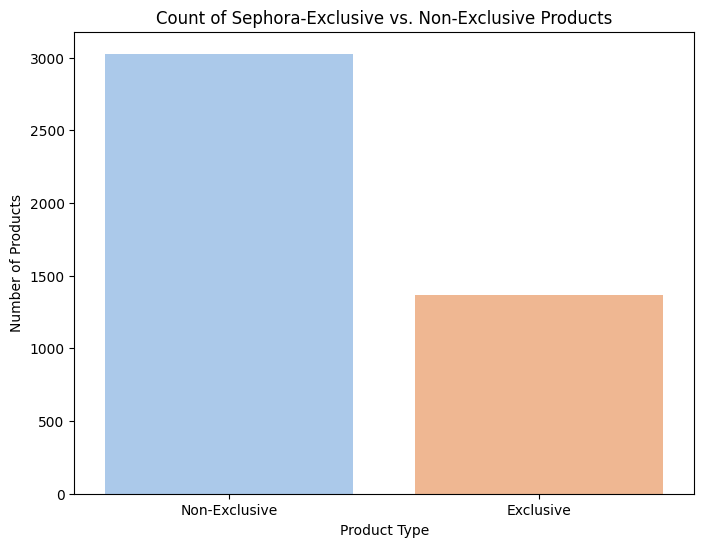

In [ ]:
# Count the number of exclusive and non-exclusive products
sephora_counts = inventory['sephora_exclusive'].value_counts().rename({True: 'Exclusive', False: 'Non-Exclusive'})

# Plot the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=sephora_counts.index, y=sephora_counts.values, palette='pastel')
plt.title("Count of Sephora-Exclusive vs. Non-Exclusive Products")
plt.xlabel("Product Type")
plt.ylabel("Number of Products")
plt.show()

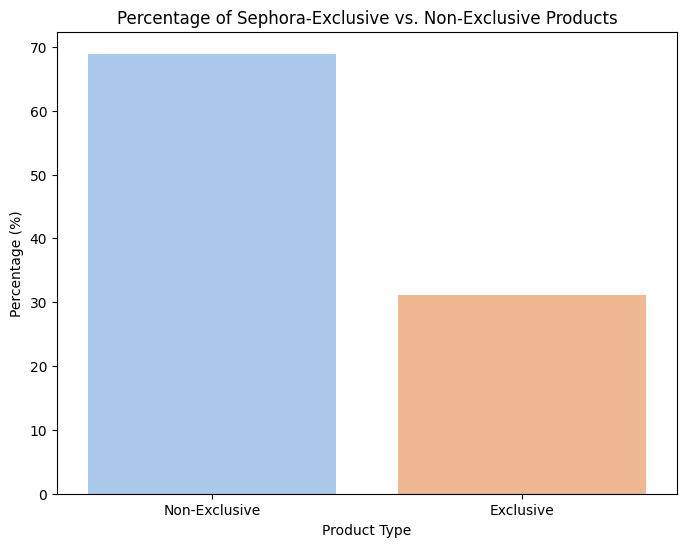

In [ ]:
# Calculate percentages
sephora_percent = (sephora_counts / sephora_counts.sum()) * 100

# Plot the percentages
plt.figure(figsize=(8, 6))
sns.barplot(x=sephora_percent.index, y=sephora_percent.values, palette='pastel')
plt.title("Percentage of Sephora-Exclusive vs. Non-Exclusive Products")
plt.xlabel("Product Type")
plt.ylabel("Percentage (%)")
plt.show()

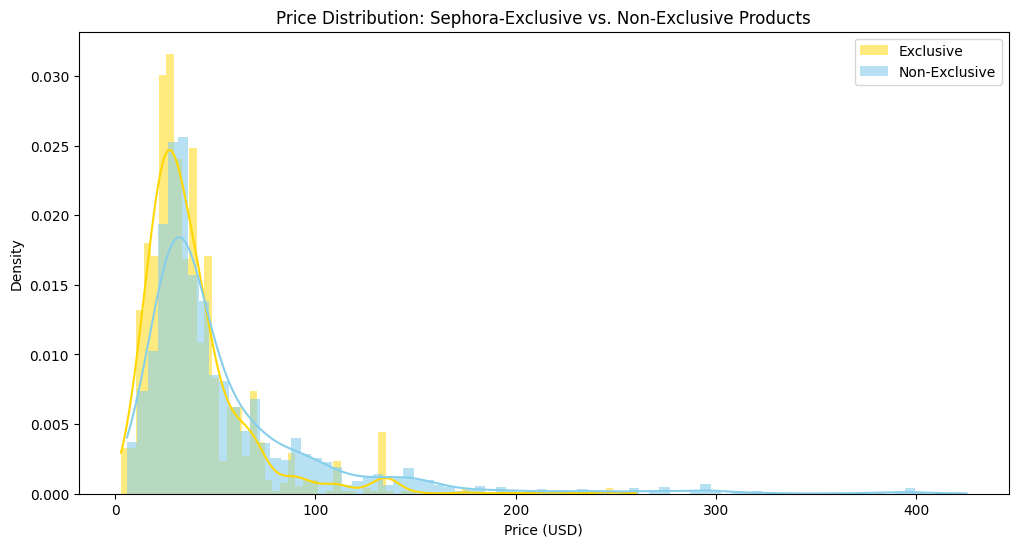

In [ ]:
# Separate exclusive and non-exclusive products
exclusive_products = inventory[inventory['sephora_exclusive'] == True]
non_exclusive_products = inventory[inventory['sephora_exclusive'] == False]

# Plot the price distributions
plt.figure(figsize=(12, 6))
sns.histplot(exclusive_products['price_usd'], color='gold', label='Exclusive', kde=True, stat="density", linewidth=0)
sns.histplot(non_exclusive_products['price_usd'], color='skyblue', label='Non-Exclusive', kde=True, stat="density", linewidth=0, alpha=0.6)
plt.title("Price Distribution: Sephora-Exclusive vs. Non-Exclusive Products")
plt.xlabel("Price (USD)")
plt.ylabel("Density")
plt.legend()
plt.show()

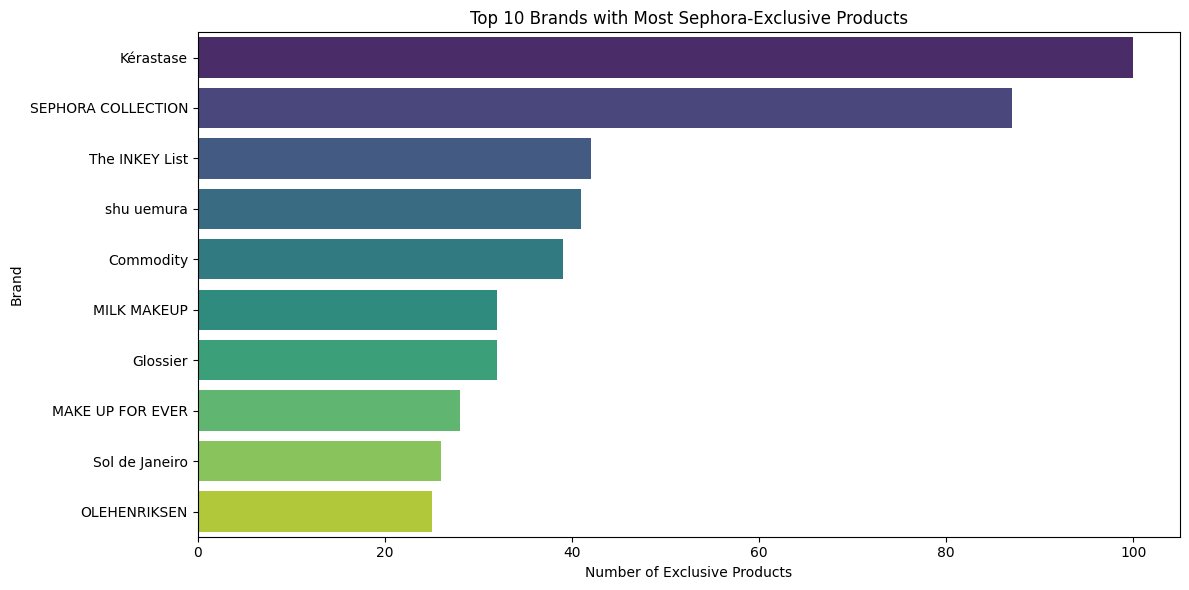

In [ ]:
# Count exclusive products by brand
top_exclusive_brands = exclusive_products['brand_name'].value_counts().head(10)

# Plot the top brands
plt.figure(figsize=(12, 6))
sns.barplot(x=top_exclusive_brands.values, y=top_exclusive_brands.index, palette='viridis')
plt.title("Top 10 Brands with Most Sephora-Exclusive Products")
plt.xlabel("Number of Exclusive Products")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

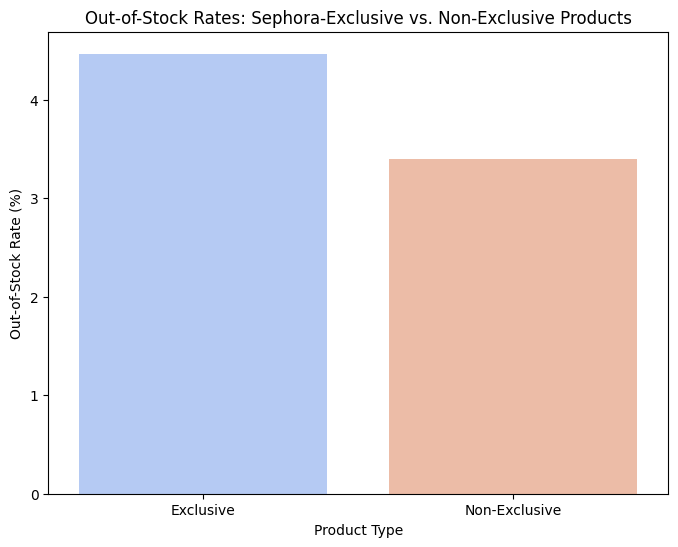

In [ ]:
# Calculate out-of-stock rates for exclusive and non-exclusive products
out_of_stock_exclusive = exclusive_products['out_of_stock'].mean() * 100
out_of_stock_non_exclusive = non_exclusive_products['out_of_stock'].mean() * 100

# Prepare data for plotting
out_of_stock_data = pd.Series({
    'Exclusive': out_of_stock_exclusive,
    'Non-Exclusive': out_of_stock_non_exclusive
})

# Plot the out-of-stock rates
plt.figure(figsize=(8, 6))
sns.barplot(x=out_of_stock_data.index, y=out_of_stock_data.values, palette='coolwarm')
plt.title("Out-of-Stock Rates: Sephora-Exclusive vs. Non-Exclusive Products")
plt.xlabel("Product Type")
plt.ylabel("Out-of-Stock Rate (%)")
plt.show()

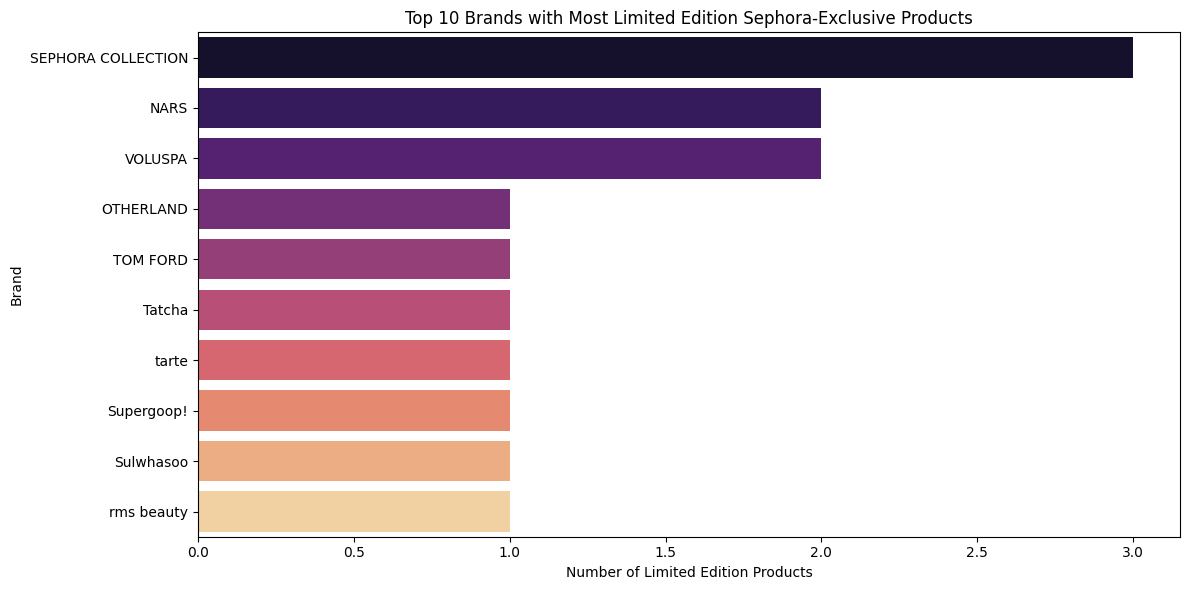

In [ ]:
# Count limited edition exclusive products by brand
limited_exclusive = exclusive_products[exclusive_products['limited_edition'] == True]['brand_name'].value_counts().head(10)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=limited_exclusive.values, y=limited_exclusive.index, palette='magma')
plt.title("Top 10 Brands with Most Limited Edition Sephora-Exclusive Products")
plt.xlabel("Number of Limited Edition Products")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate average prices
avg_price_exclusive = exclusive_products['price_usd'].mean()
avg_price_non_exclusive = non_exclusive_products['price_usd'].mean()

# Print the results
print(f"Average Price of Sephora-Exclusive Products: ${avg_price_exclusive:.2f}")
print(f"Average Price of Non-Exclusive Products: ${avg_price_non_exclusive:.2f}")

Average Price of Sephora-Exclusive Products: $39.06
Average Price of Non-Exclusive Products: $56.27


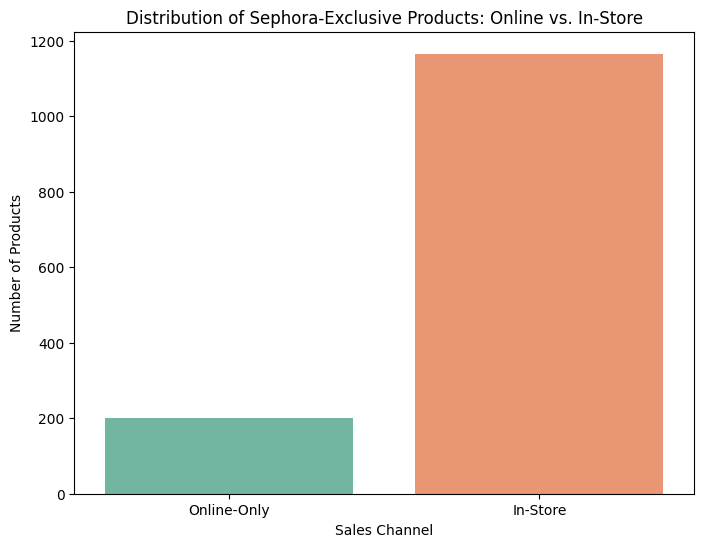

In [ ]:
# Count online-only exclusive products
online_exclusive = exclusive_products[exclusive_products['online_only'] == True].shape[0]
in_store_exclusive = exclusive_products[exclusive_products['online_only'] == False].shape[0]

# Prepare data for plotting
online_exclusive_data = pd.Series({
    'Online-Only': online_exclusive,
    'In-Store': in_store_exclusive
})

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=online_exclusive_data.index, y=online_exclusive_data.values, palette='Set2')
plt.title("Distribution of Sephora-Exclusive Products: Online vs. In-Store")
plt.xlabel("Sales Channel")
plt.ylabel("Number of Products")
plt.show()

In [ ]:
# Summary statistics for exclusive products
exclusive_summary = exclusive_products.describe()

# Display the summary
print("Summary Statistics for Sephora-Exclusive Products:")
print(exclusive_summary)

Summary Statistics for Sephora-Exclusive Products:
         price_usd
count  1365.000000
mean     39.061443
std      27.944494
min       3.000000
25%      24.000000
50%      32.000000
75%      45.000000
max     260.000000


## Product Category

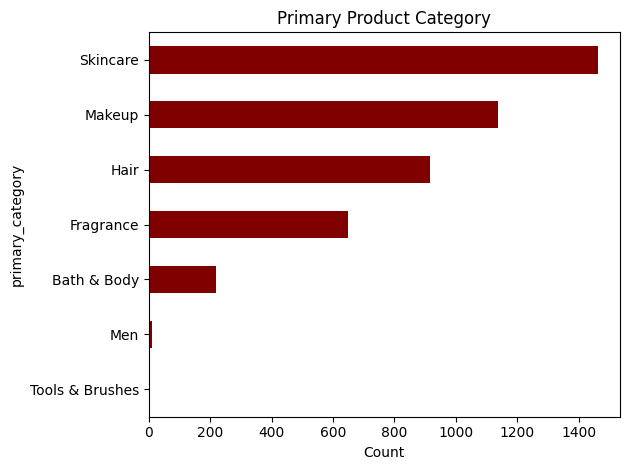

In [ ]:
product_cleaned['primary_category'].value_counts().iloc[::-1].plot(kind= 'barh', color='maroon')

plt.title('Primary Product Category')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

## Secondary Product category

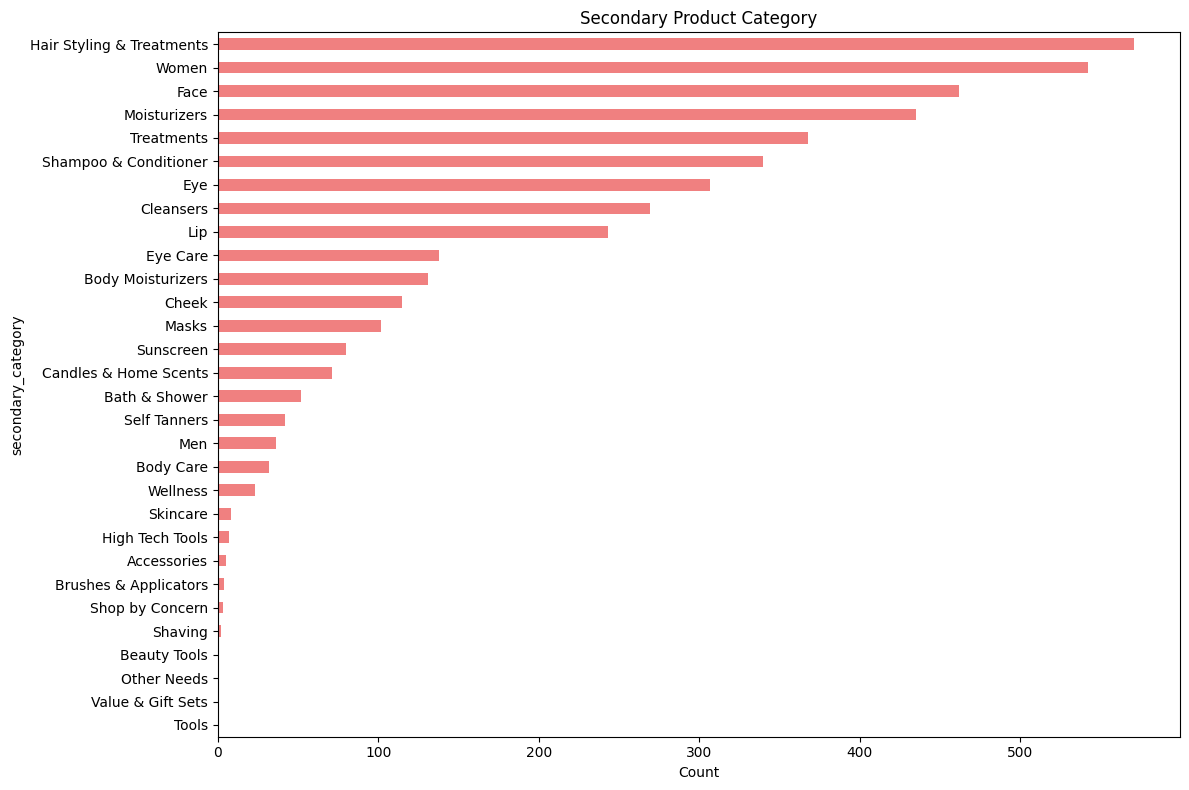

In [ ]:
product_cleaned['secondary_category'].value_counts().iloc[::-1].plot(kind='barh', color='lightcoral',figsize=(12, 8))

plt.title('Secondary Product Category')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

## skincare analysis

## Expensive skincare 

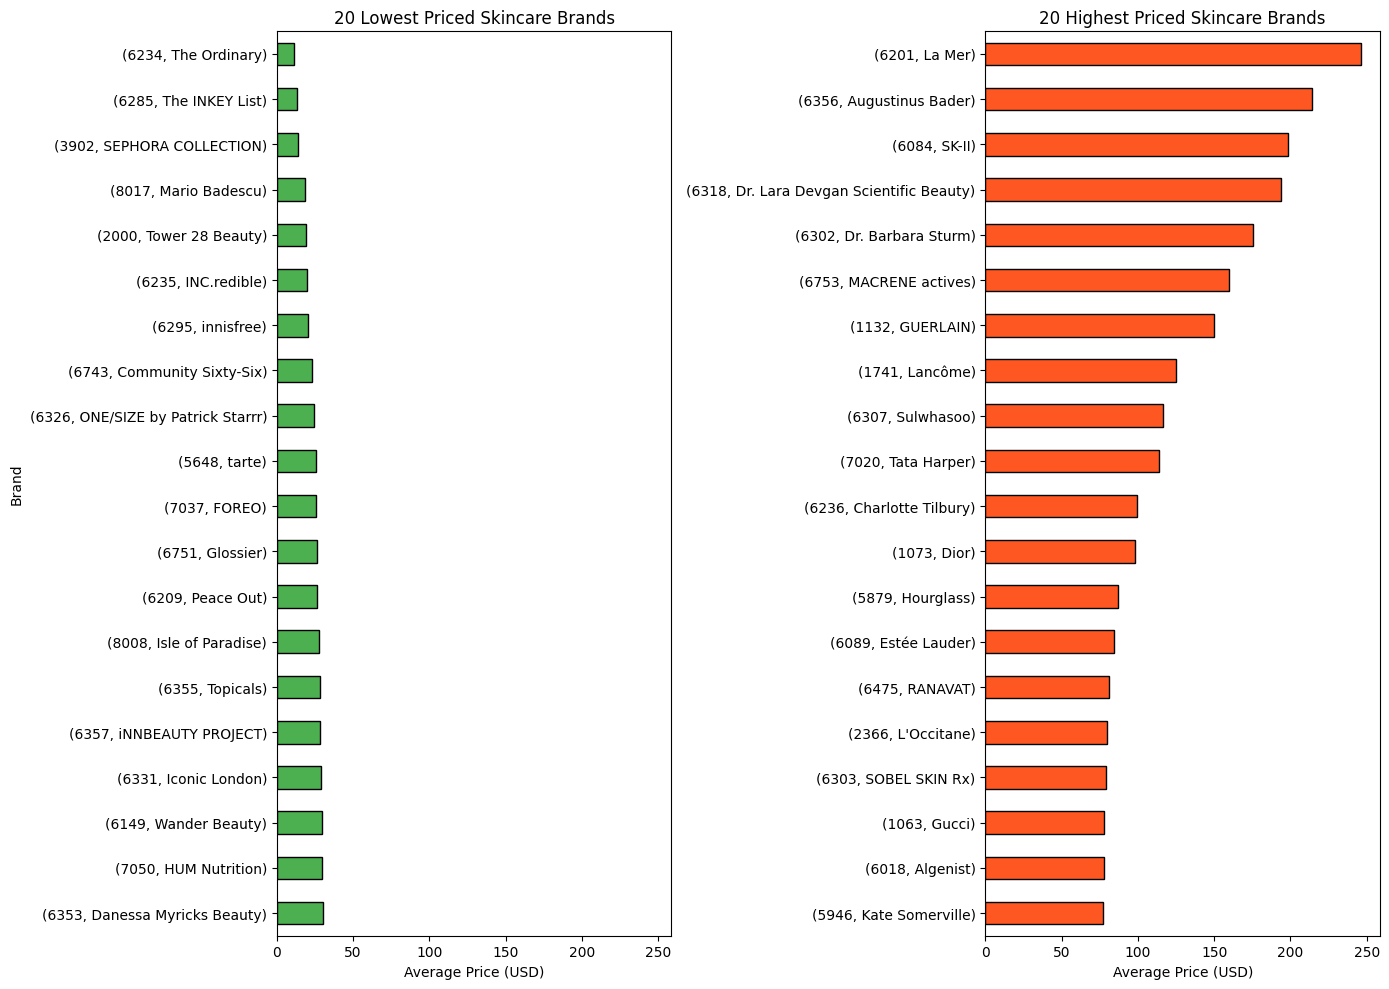

In [ ]:
brands_skincare = product_cleaned.query('primary_category == "Skincare" and secondary_category != "High Tech Tools"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True)

ten_lowest = product_cleaned.query('primary_category == "Skincare" and secondary_category != "High Tech Tools"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).head(20)
ten_lowest = ten_lowest.iloc[::-1]
ten_highest = product_cleaned.query('primary_category == "Skincare" and secondary_category != "High Tech Tools"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).tail(20)

# Plot the skincare analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10), sharex=True)

# Plot the 20 lowest-priced skincare brands
ten_lowest.plot(kind='barh', color='#4CAF50', ax=ax1, edgecolor='black')
ax1.set_title('20 Lowest Priced Skincare Brands')
ax1.set_xlabel('Average Price (USD)')
ax1.set_ylabel('Brand')

# Plot the 20 highest-priced skincare brands
ten_highest.plot(kind='barh', color='#FF5722', ax=ax2, edgecolor='black')
ax2.set_title('20 Highest Priced Skincare Brands')
ax2.set_xlabel('Average Price (USD)')
ax2.set_ylabel('')

# Adjust layout for readability
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

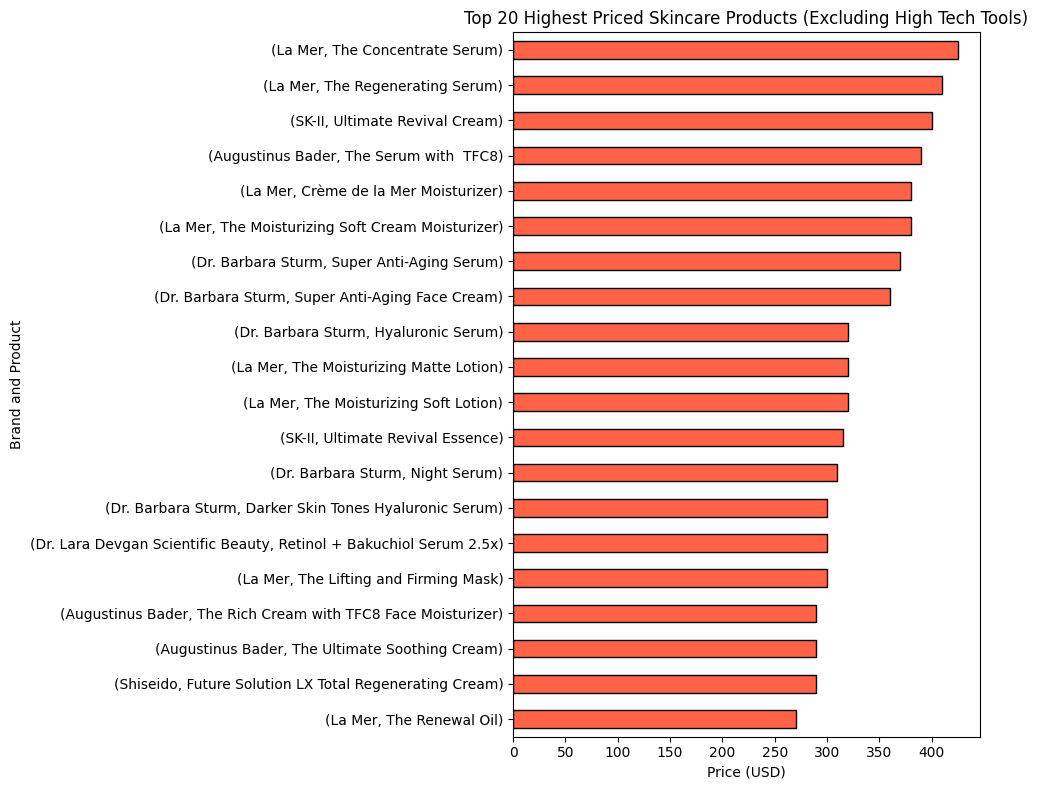

In [ ]:
plt.figure(figsize=(10, 6))


makeup_price = product_cleaned[['product_name', 'brand_name', 'primary_category', 'price_usd', 'secondary_category']].query('primary_category == "Skincare" and secondary_category !="High Tech Tools"').nlargest(20, 'price_usd')
makeup_plot = makeup_price.drop(columns=['primary_category', 'secondary_category']).groupby(['brand_name', 'product_name'])['price_usd'].max().sort_values(ascending=False).iloc[::-1]

plt.figure(figsize=(10, 8))

# Plot the data
makeup_plot.plot(kind='barh', color='#FF6347', edgecolor='black')

# Add titles and labels
plt.title("Top 20 Highest Priced Skincare Products (Excluding High Tech Tools)")
plt.xlabel("Price (USD)")
plt.ylabel("Brand and Product")

# Tight layout for readability
plt.tight_layout()

# Show the plot
plt.show()

## Most_Love Skincare

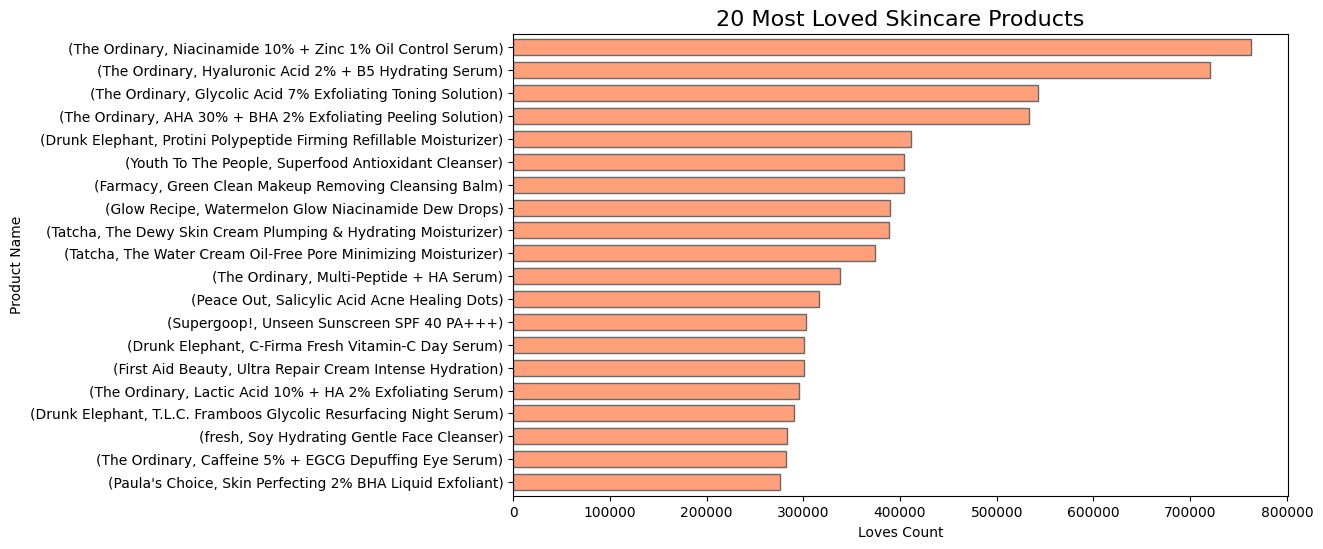

In [ ]:
plt.figure(figsize=(10, 6))


skincare_loved_product = product_cleaned.query('primary_category == "Skincare" and secondary_category !="High Tech Tools"').groupby(['brand_name', 'product_name'])['loves_count'].sum().sort_values(ascending=False).head(20).iloc[::-1]
skincare_loved_product.plot(kind='barh',  color='lightsalmon', edgecolor='dimgrey', width=0.7)

plt.title('20 Most Loved Skincare Products', fontdict={'fontsize': 16})
plt.xlabel('Loves Count')
plt.ylabel('Product Name')


plt.show()

## Makeup Brand Analysis

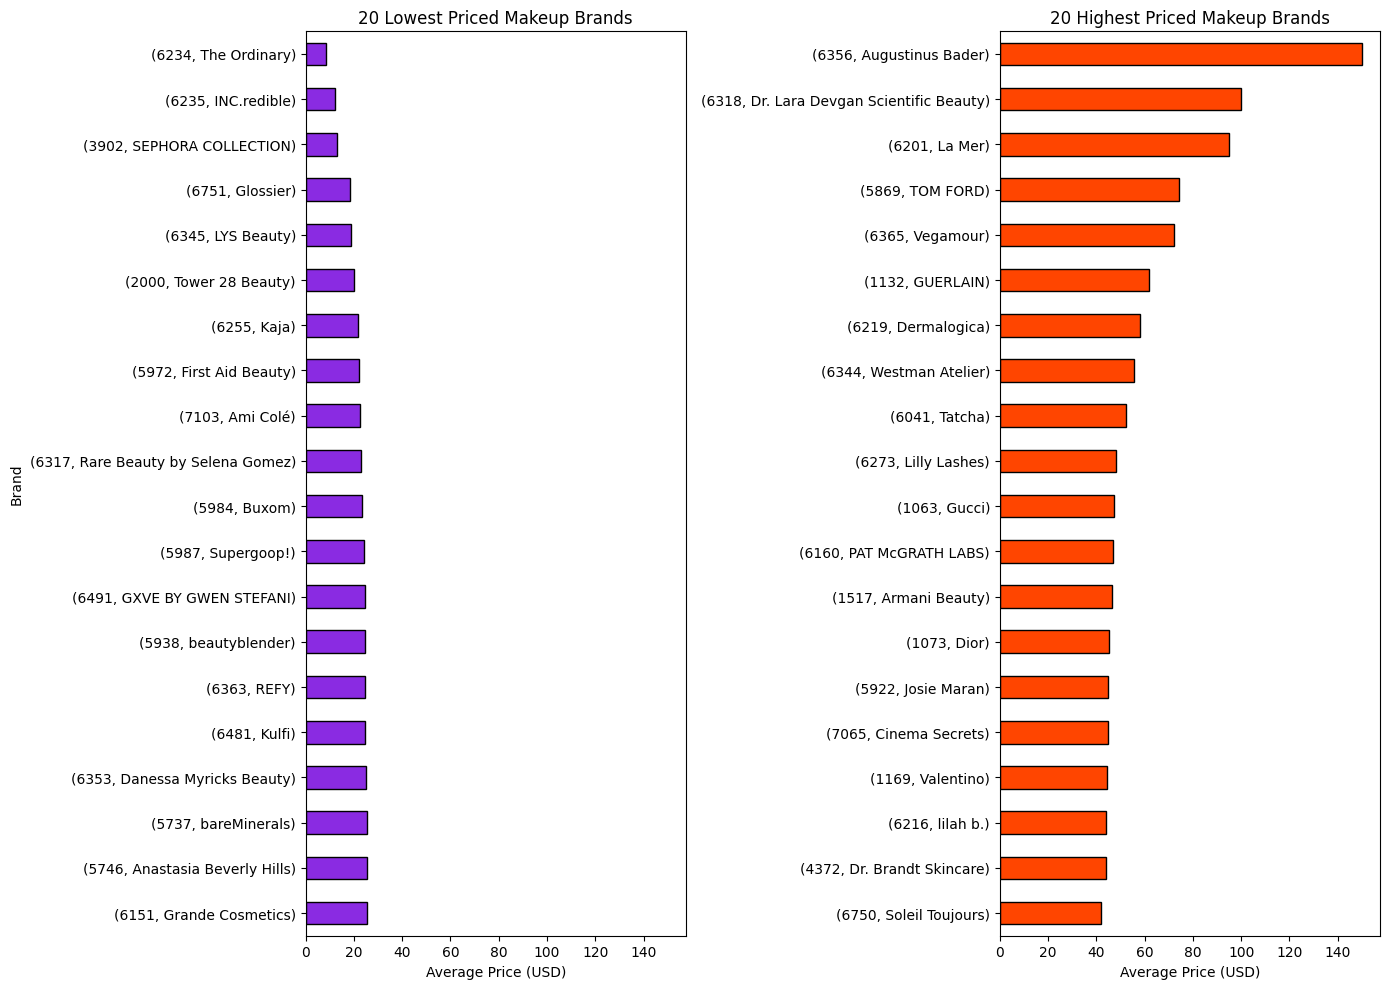

In [ ]:
brands_makeup = product_cleaned.query('primary_category == "Makeup"') \
                           .groupby(['brand_id', 'brand_name'])['price_usd'].mean()

# Get the 20 lowest and 20 highest average-priced makeup brands
twenty_lowest_makeup = brands_makeup.sort_values(ascending=True).head(20).iloc[::-1]  # Reversed for better plotting order
twenty_highest_makeup = brands_makeup.sort_values(ascending=True).tail(20)

# Set up a figure with subplots for side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 10), sharex=True)

# Plot the 20 lowest-priced makeup brands
twenty_lowest_makeup.plot(kind='barh', color='#8A2BE2', ax=ax1, edgecolor='black')
ax1.set_title('20 Lowest Priced Makeup Brands')
ax1.set_xlabel('Average Price (USD)')
ax1.set_ylabel('Brand')

# Plot the 20 highest-priced makeup brands
twenty_highest_makeup.plot(kind='barh', color='#FF4500', ax=ax2, edgecolor='black')
ax2.set_title('20 Highest Priced Makeup Brands')
ax2.set_xlabel('Average Price (USD)')
ax2.set_ylabel('')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

## most love MakeUp product

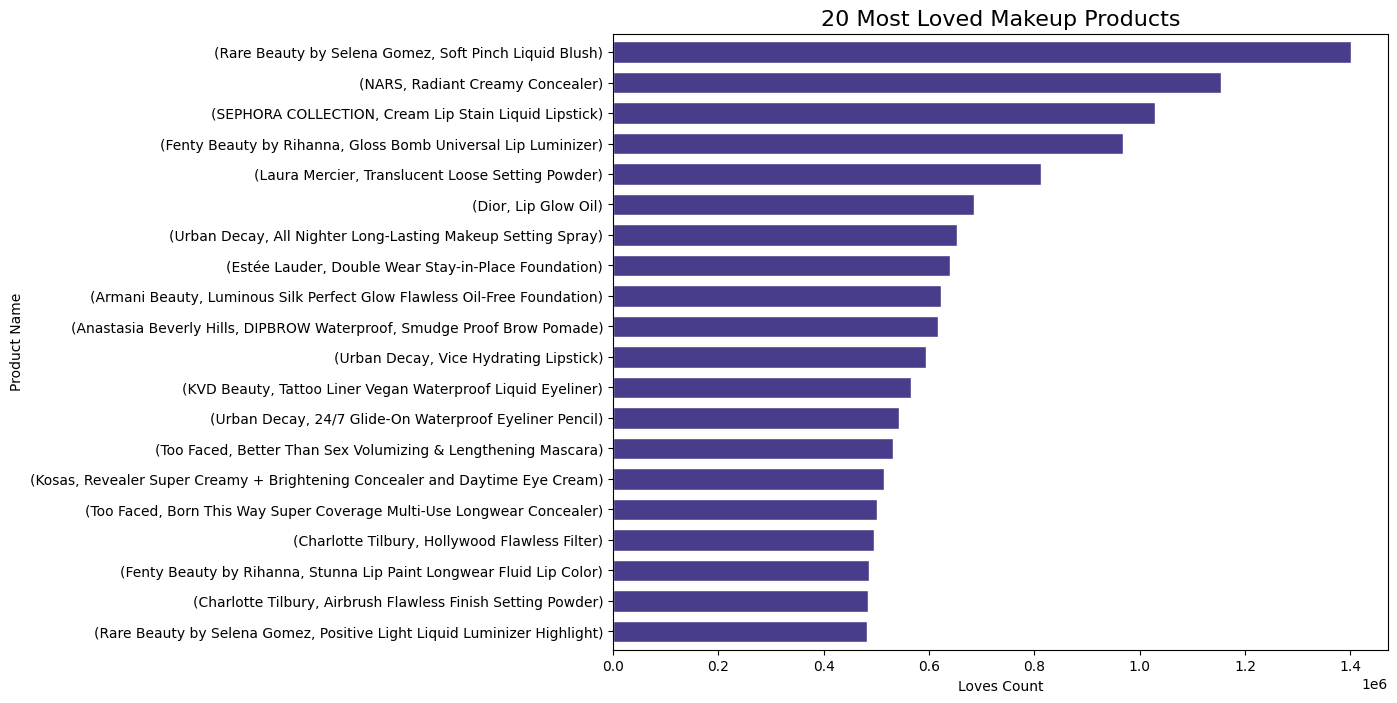

In [ ]:
plt.figure(figsize=(10, 8))

makeup_loved_product = product_cleaned.query('primary_category == "Makeup"').groupby(['brand_name', 'product_name'])['loves_count'].sum().sort_values(ascending=False).head(20).iloc[::-1]
makeup_loved_product.plot(kind='barh', color='darkslateblue', edgecolor='white', width=0.7)

plt.title('20 Most Loved Makeup Products', fontdict={'fontsize': 16})
plt.xlabel('Loves Count')
plt.ylabel('Product Name')


plt.show()

## most expensive makeUp product

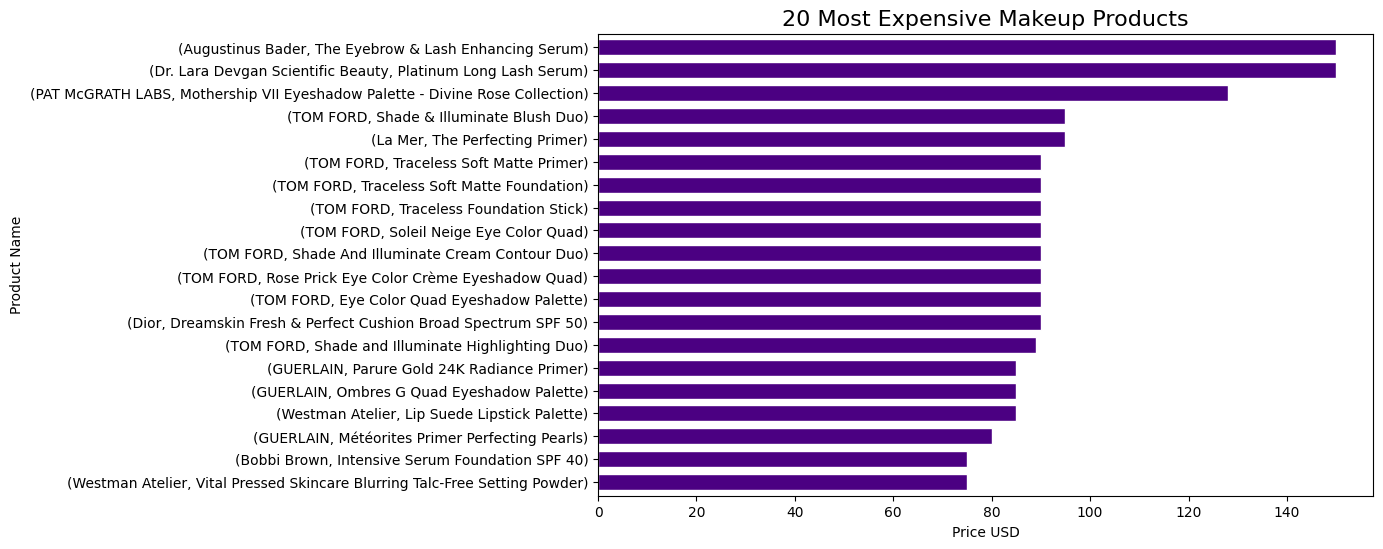

In [ ]:
plt.figure(figsize=(10, 6))


makeup_price = product_cleaned[['product_name', 'brand_name', 'primary_category', 'price_usd']].query('primary_category == "Makeup"').nlargest(20, 'price_usd')
makeup_plot = makeup_price.drop(columns=['primary_category']).groupby(['brand_name', 'product_name'])['price_usd'].max().sort_values(ascending=False).iloc[::-1]


makeup_plot.plot(kind='barh', color='indigo', edgecolor='white', width=0.7)
plt.title('20 Most Expensive Makeup Products', fontdict={'fontsize': 16})
plt.xlabel('Price USD')
plt.ylabel('Product Name')


plt.show()

## Hair Product Analysis 

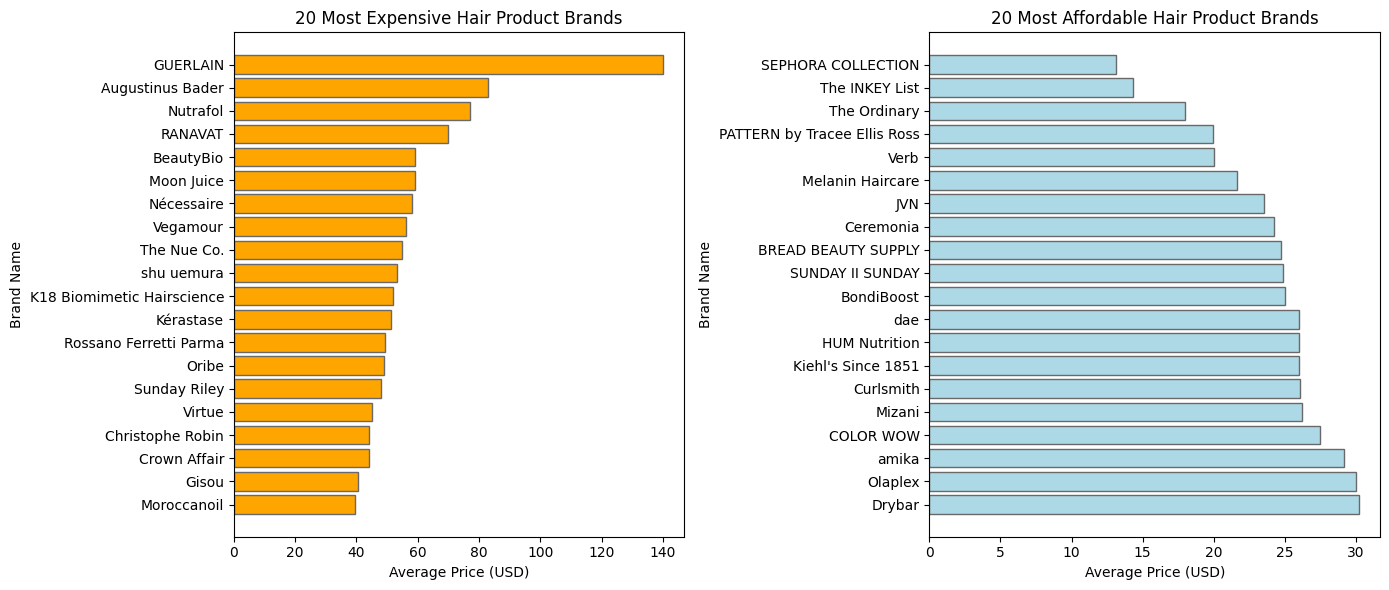

In [ ]:
brands_hair = product_cleaned.query('primary_category == "Hair" and secondary_category == "Hair Styling & Treatments" and secondary_category != "Tools" and secondary_category != "Value & Gift Sets"')\
                    .groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True)

twenty_lowest_hair = product_cleaned.query('primary_category == "Hair" and secondary_category == "Hair Styling & Treatments" and secondary_category != "Tools" and secondary_category != "Value & Gift Sets"')\
                    .groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).head(20).iloc[::-1]
twenty_highest_hair = product_cleaned.query('primary_category == "Hair" and secondary_category == "Hair Styling & Treatments" and secondary_category != "Tools" and secondary_category != "Value & Gift Sets"')\
                    .groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).tail(20)


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].barh(twenty_highest_hair.index.get_level_values('brand_name'), twenty_highest_hair.values, color='orange', edgecolor='dimgrey')
axs[0].set_xlabel('Average Price (USD)')
axs[0].set_ylabel('Brand Name')
axs[0].set_title('20 Most Expensive Hair Product Brands')


axs[1].barh(twenty_lowest_hair.index.get_level_values('brand_name'), twenty_lowest_hair.values, color='lightblue', edgecolor='dimgrey')
axs[1].set_xlabel('Average Price (USD)')
axs[1].set_ylabel('Brand Name')
axs[1].set_title('20 Most Affordable Hair Product Brands')


plt.tight_layout()
plt.show()

## most loved hair product

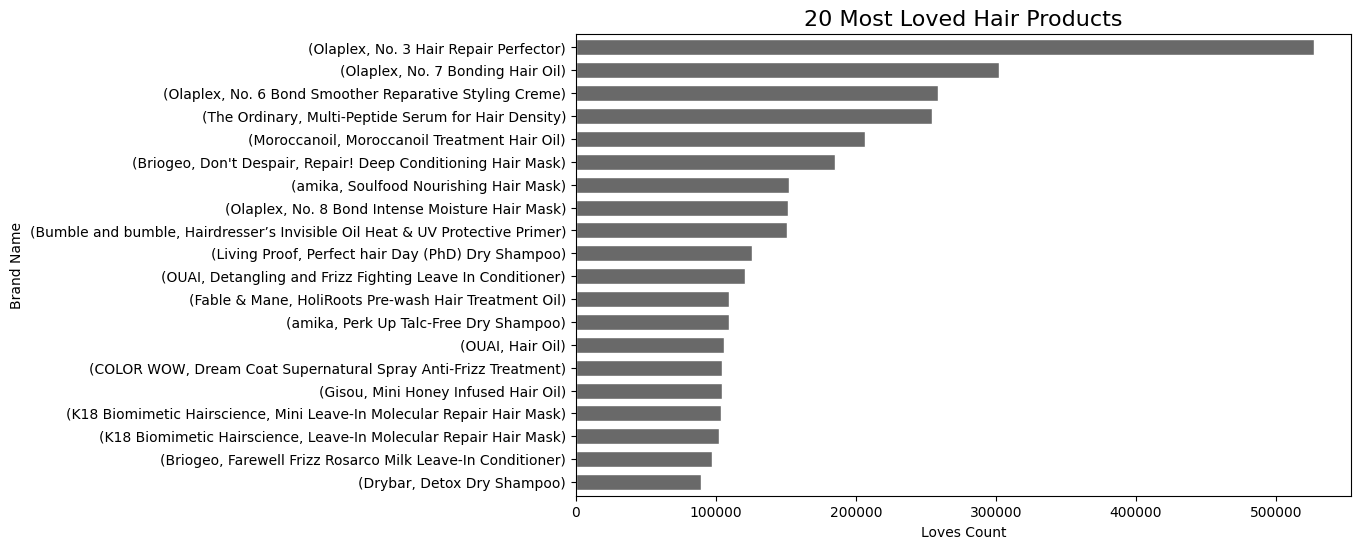

In [ ]:
plt.figure(figsize=(10, 6))

df_avg_brands_hair = product_cleaned.query('primary_category == "Hair" and secondary_category == "Hair Styling & Treatments" and secondary_category != "Tools" and secondary_category != "Value & Gift Sets"')\
                    .groupby(['brand_name', 'product_name'])['loves_count'].sum().sort_values(ascending=False).head(20).iloc[::-1]
df_avg_brands_hair.plot(kind='barh', color='dimgrey', edgecolor='white', width=0.7)


plt.title('20 Most Loved Hair Products', fontdict={'fontsize': 16})
plt.xlabel('Loves Count')
plt.ylabel('Brand Name')


plt.show()

## Most expensive hair product

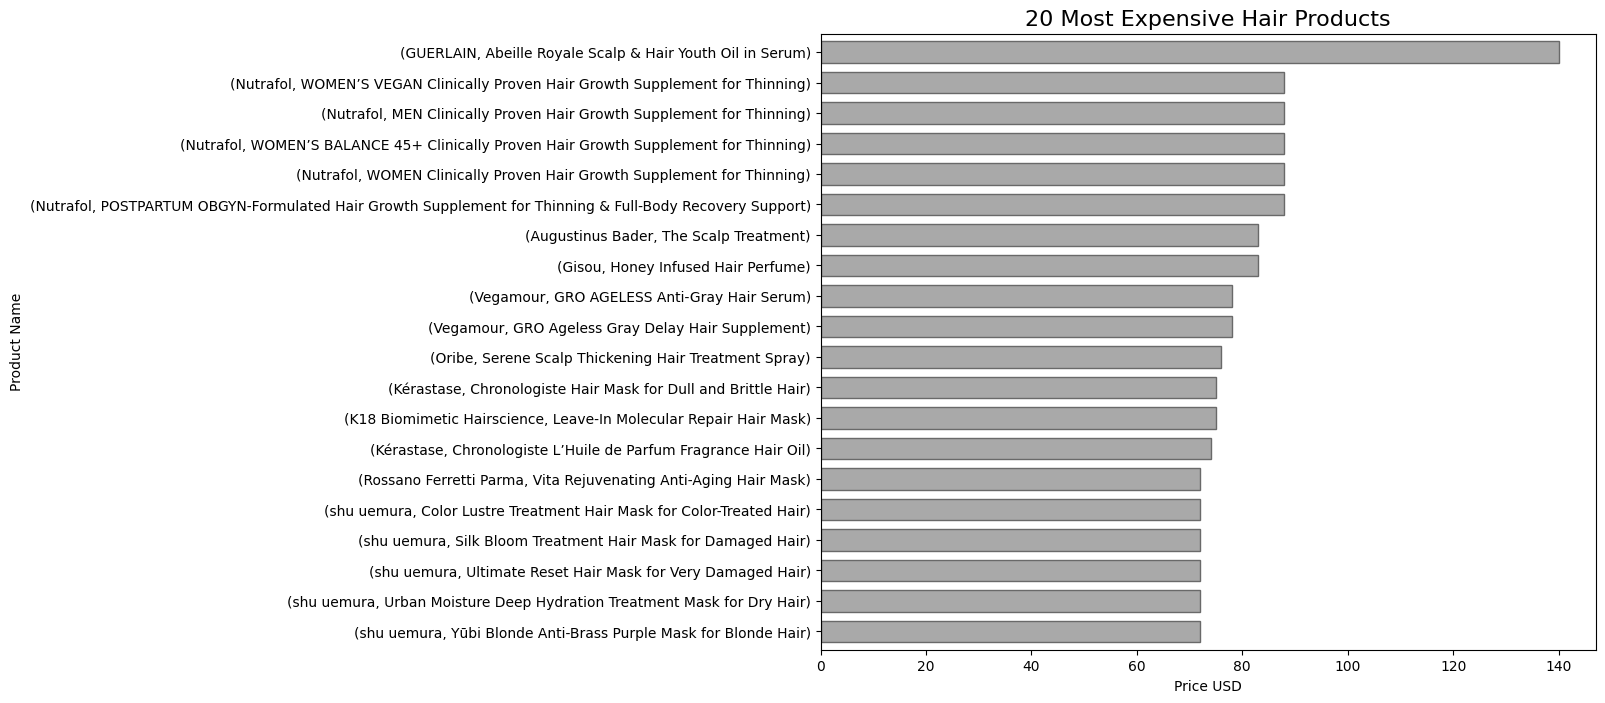

In [ ]:
plt.figure(figsize=(10, 8))


hair_product_price = product_cleaned[['product_name', 'brand_name', 'primary_category', 'price_usd', 'secondary_category']].query('primary_category == "Hair" and secondary_category == "Hair Styling & Treatments" and secondary_category != "Tools" and secondary_category != "Value & Gift Sets"').nlargest(20, 'price_usd')
hair_product_plot = hair_product_price.drop(columns=['primary_category', 'secondary_category']).groupby(['brand_name', 'product_name'])['price_usd'].max().sort_values(ascending=False).iloc[::-1]


hair_product_plot.plot(kind='barh', color='darkgrey', edgecolor='dimgrey', width=0.7)
plt.title('20 Most Expensive Hair Products', fontdict={'fontsize': 16})
plt.xlabel('Price USD')
plt.ylabel('Product Name')


plt.show()

## Fragrance Product Analysis

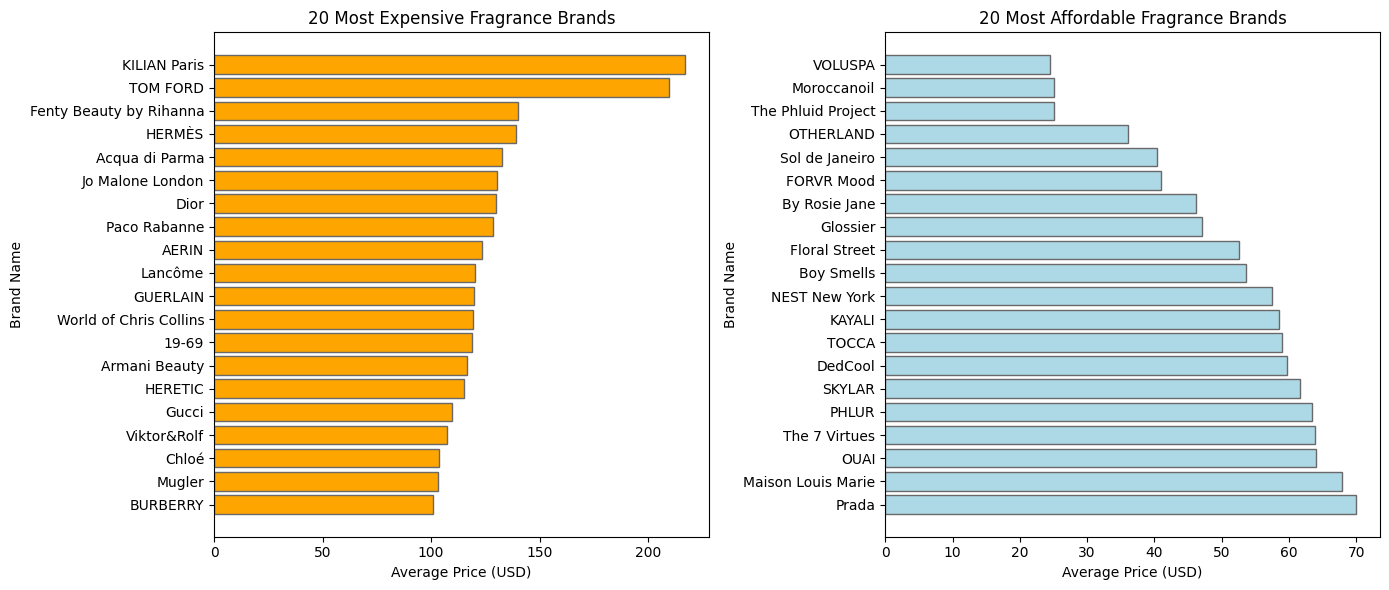

In [ ]:
brands_fragrance = product_cleaned.query('primary_category == "Fragrance"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True)

twenty_lowest_fragrance = product_cleaned.query('primary_category == "Fragrance"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).head(20).iloc[::-1]
twenty_highest_fragrance = product_cleaned.query('primary_category == "Fragrance"').groupby(['brand_id', 'brand_name'])['price_usd'].mean().sort_values(ascending=True).tail(20)


# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6))


axs[0].barh(twenty_highest_fragrance.index.get_level_values('brand_name'), twenty_highest_fragrance.values, color='orange', edgecolor='dimgrey')
axs[0].set_xlabel('Average Price (USD)')
axs[0].set_ylabel('Brand Name')
axs[0].set_title('20 Most Expensive Fragrance Brands')


axs[1].barh(twenty_lowest_fragrance.index.get_level_values('brand_name'), twenty_lowest_fragrance.values, color='lightblue', edgecolor='dimgrey')
axs[1].set_xlabel('Average Price (USD)')
axs[1].set_ylabel('Brand Name')
axs[1].set_title('20 Most Affordable Fragrance Brands')


plt.tight_layout()
plt.show()

## Most Loved Fragrances

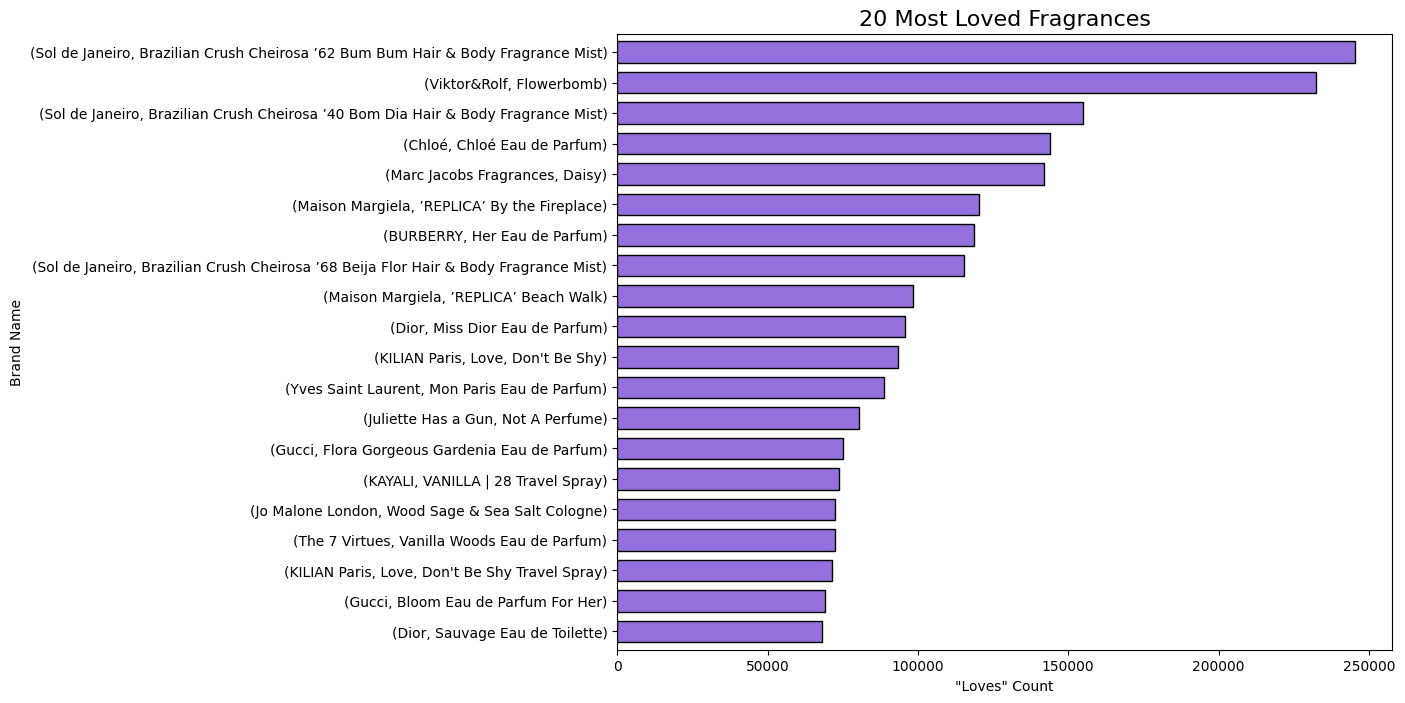

In [ ]:
plt.figure(figsize=(10, 8))

df_fragrance_loves = product_cleaned.query('primary_category == "Fragrance"').groupby(['brand_name', 'product_name'])['loves_count'].sum().sort_values(ascending=False).head(20).iloc[::-1]

df_fragrance_loves.plot(kind='barh', color='mediumpurple', edgecolor='black', width=0.7)

plt.title('20 Most Loved Fragrances', fontdict={'fontsize': 16})
plt.xlabel('"Loves" Count')
plt.ylabel('Brand Name')


plt.show()

## Most Expensive Fragrance

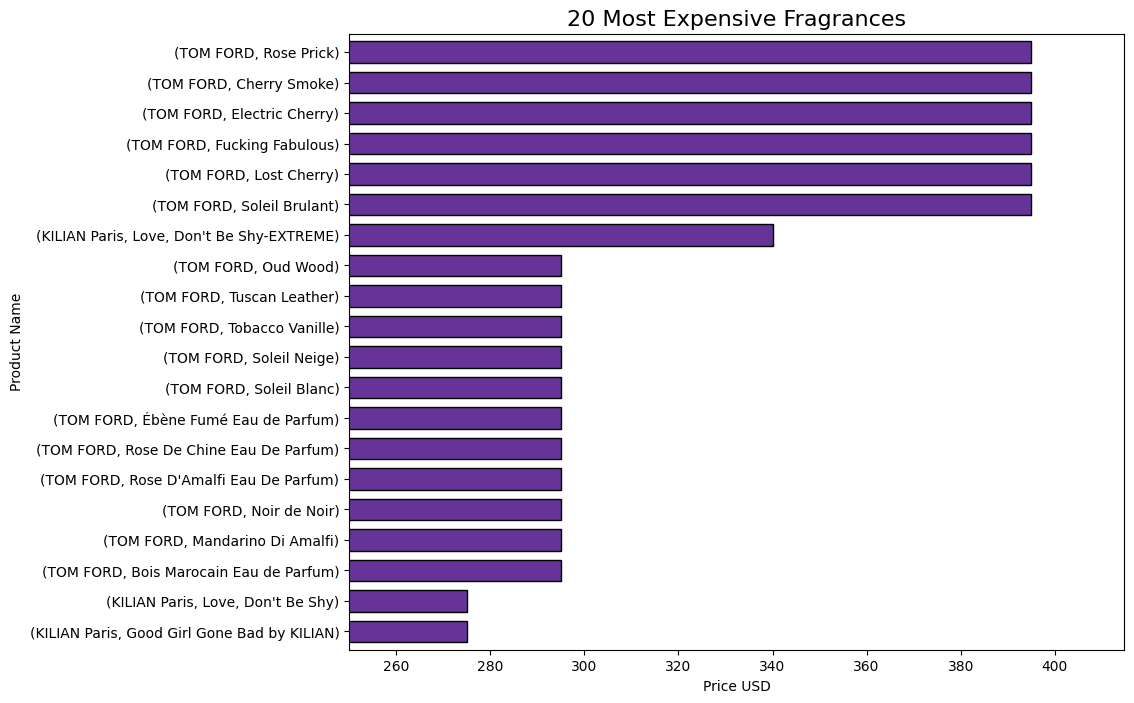

In [ ]:
plt.figure(figsize=(10, 8))


fragrance_price = product_cleaned[['product_name', 'brand_name', 'primary_category', 'price_usd']].query('primary_category == "Fragrance"').nlargest(20, 'price_usd')
fragrance_plot = fragrance_price.drop(columns=['primary_category']).groupby(['brand_name', 'product_name'])['price_usd'].max().sort_values(ascending=False).iloc[::-1]


fragrance_plot.plot(kind='barh', color='rebeccapurple', edgecolor='black', width=0.7)
plt.title('20 Most Expensive Fragrances', fontdict={'fontsize': 16})
plt.xlabel('Price USD')
plt.ylabel('Product Name')
plt.xlim(250)


plt.show()
